<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Configure-Data" data-toc-modified-id="Configure-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Configure Data</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Preparing-Dataset" data-toc-modified-id="Preparing-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preparing Dataset</a></span></li><li><span><a href="#Model-Building" data-toc-modified-id="Model-Building-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Building</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Euclidean-distance" data-toc-modified-id="Euclidean-distance-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Euclidean distance</a></span></li><li><span><a href="#Get-K-Neighbors" data-toc-modified-id="Get-K-Neighbors-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Get K Neighbors</a></span></li><li><span><a href="#Get-response" data-toc-modified-id="Get-response-4.0.3"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span>Get response</a></span></li><li><span><a href="#Get-accuracy" data-toc-modified-id="Get-accuracy-4.0.4"><span class="toc-item-num">4.0.4&nbsp;&nbsp;</span>Get accuracy</a></span></li><li><span><a href="#Main-function" data-toc-modified-id="Main-function-4.0.5"><span class="toc-item-num">4.0.5&nbsp;&nbsp;</span>Main function</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import operator
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Configure Data

In [2]:
boston_dataset = load_boston() 

In [3]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
print(boston.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


## Exploratory Data Analysis

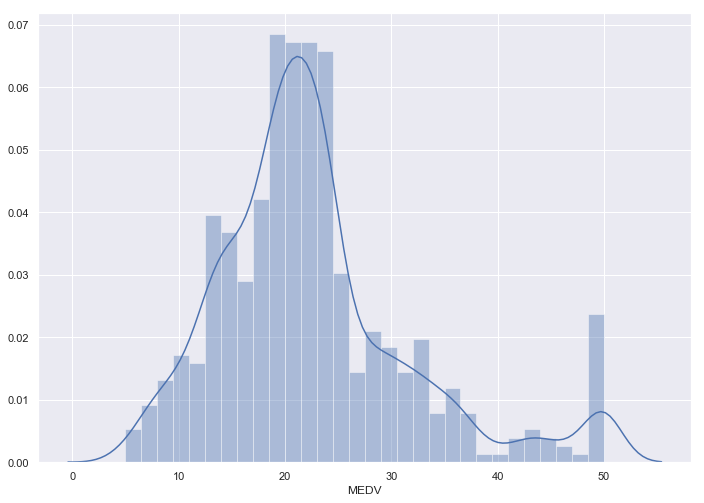

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)

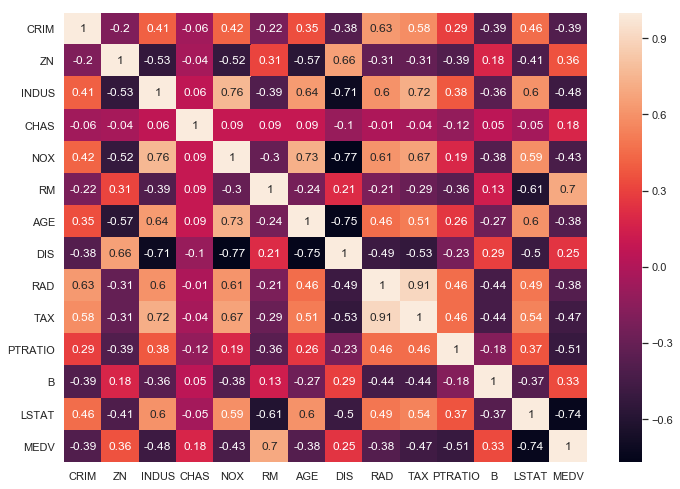

In [7]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

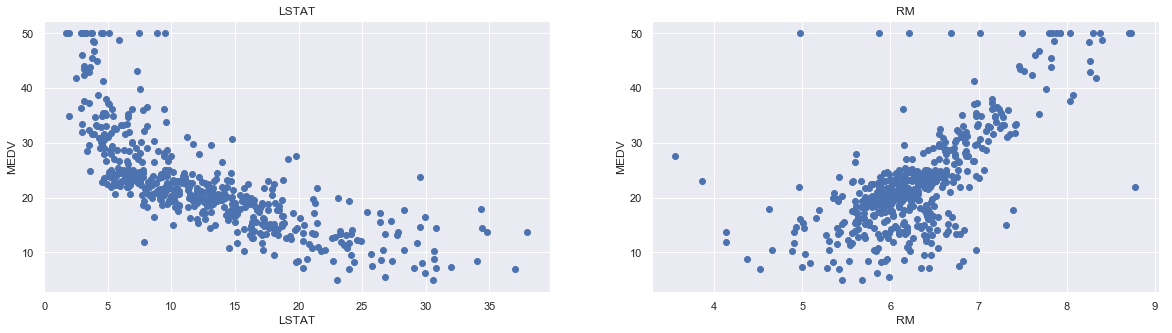

In [8]:
plt.figure(figsize=(20, 5))

# We'll only use LSTAT and RM for our purpose
features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

## Preparing Dataset

In [9]:
dataset = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'], boston['MEDV']], columns=features+['MEDV'])

In [10]:
dataset.head()

,LSTAT,RM,MEDV
0,4.98,6.575,24.0
1,9.14,6.421,21.6
2,4.03,7.185,34.7
3,2.94,6.998,33.4
4,5.33,7.147,36.2


In [11]:
train_set = dataset.sample(frac=0.7, random_state=200)
test_set = dataset.drop(train_set.index)
train_set = train_set.to_numpy()
test_set = test_set.to_numpy()
print(len(train_set))
print(len(test_set))

354
152


In [12]:
print(train_set[0])
print(test_set[0])

[18.06   5.783 22.5  ]
[ 4.98   6.575 24.   ]


## Model Building

#### Euclidean distance


In [13]:
# numpy implementation


def euclideanDistance(instance1, instance2):
    return np.round(np.linalg.norm(instance1[:-1] - instance2[:-1]), 3)

In [14]:
# import math
#
#
# def euclideanDistance(instance1, instance2, length):
#     distance = 0
#     for x in range(length):
#         distance += pow((instance1[x] - instance2[x]), 2)
#     return math.sqrt(distance)

In [15]:
# test euclidean distance

data1 = train_set[0]
data2 = train_set[23]
print(data1, data2)
distance = euclideanDistance(data1, data2)
print('Distance: ' + repr(distance))

[18.06   5.783 22.5  ] [19.77   5.349  8.3  ]
Distance: 1.764


#### Get K Neighbors

In [16]:
def getKNeighbors(trainingSet, testInstance, k):
    distances = []
    for i in trainingSet:
        dist = euclideanDistance(i, testInstance)
        distances.append((i, dist))

    distances.sort(key=operator.itemgetter(1))

    neighbors = []
    for x in range(k):
        neighbors.append(distances[x])
    return neighbors

In [17]:
# test getKNeighbors

test_instance = test_set[20]
print(f'Test Instance: {test_instance}')
k = 3
neighbors = getKNeighbors(test_set, test_instance, k)
print(f'Closest {k} neigbors:{neighbors}')

Test Instance: [ 9.1    5.874 20.3  ]
Closest 3 neigbors:[(array([ 9.1  ,  5.874, 20.3  ]), 0.0), (array([ 9.25 ,  5.876, 20.9  ]), 0.15), (array([ 8.88 ,  5.875, 50.   ]), 0.22)]


#### Get response

In [18]:
def getResponse(neighbors, k):
    average = 0
    for i in range(k):
        average += neighbors[i][0][-1]
    return round(average / k, 1) # divided by the number of points    

In [19]:
# test getResponse
# point 1 = [31.99, 5., 7.4]
# 7.4 -> output at point 1
# 2.284 -> distance to point 1
neighbors = [([31.99,  5.,  7.4], 2.284), ([30.81,  5.277,  7.2],
                                           2.317), ([20.32,  6.343,  7.2],  2.3176)]

print(neighbors[0][-1])
print(neighbors[0][0][-1])
print()
print(getResponse(neighbors, 3))

2.284
7.4

7.3


#### Get accuracy

In [20]:
def rootMeanSquaredError(actual, predicted):
    assert len(actual) == len(predicted)
    n = len(predicted)
    rmse = np.linalg.norm(predicted - actual) / np.sqrt(n)
    return rmse

#### Main function

In [21]:
def main(train_set, test_set, k):
    errors = []
    k_range = range(1, k+1)
    for x in k_range:
        predictions = []
        for i in range(len(test_set)):
            neighbors = getKNeighbors(train_set, test_set[i], x)
            result = getResponse(neighbors, x)
            predictions.append(result)

        predictions = np.array(predictions)
        error = rootMeanSquaredError(test_set[:, -1], predictions)
        errors.append(error)

    return list(k_range), errors

In [22]:
k = int(input("Range of k (1-..): "))
K, errors = main(train_set, test_set, k)

Range of k (1-..): 20


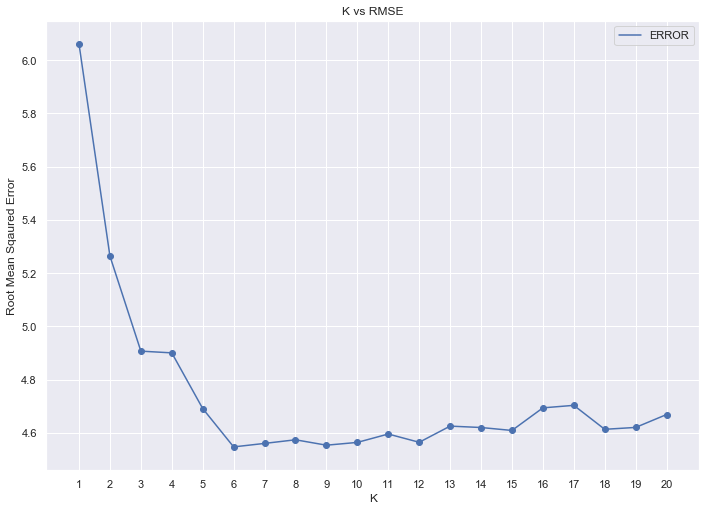

In [23]:
plt.plot(K, errors, label="ERROR")
plt.scatter(K, errors)
plt.title('K vs RMSE')
plt.xticks(ticks=range(1, k+1))
plt.xlabel('K')
plt.ylabel('Root Mean Sqaured Error')
plt.legend()